In [1051]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [1052]:
dim = 1

def f(coord):
    if coord >= 35:
        return coord - np.sin(coord) - 69
    else:
        return -coord

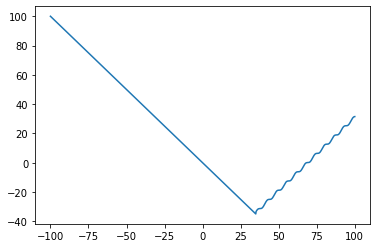

In [1053]:
xs = np.linspace(-100, 100, 1000)
ys = list(map(f, xs))

plt.plot(xs, ys)
plt.show()

In [1054]:
def gradient(coord, h=1e-5):
    grad_list = np.array([], dtype=np.float64)
    for index, x in enumerate(coord):
        f_left = coord.copy()
        f_left[index] = f(x - h)

        f_right = coord.copy()
        f_right[index] = f(x + h)

        grad_2d = (f_right - f_left) / (2 * h)
        grad_list = np.concatenate((grad_list, grad_2d))

    return np.array(grad_list, dtype=np.float64)

In [1055]:
def gradient_descent(lr=0.1, iterations=1000, scale=100, check_batch=50, eps=1e-5):
    meta = {
        "gradient_call_count": 0,
        "function_call_count": 0
    }

    points = np.array([], dtype=np.float64).reshape(0, 2)

    coord = np.random.rand(dim) * random.randint(-scale, scale)

    for i in range(iterations):
        points = np.append(
            points,
            np.array([coord, f(coord)], dtype=np.float64).reshape(1, 2),
            axis=0
        )

        meta["function_call_count"] += 1

        avg_changes = np.average(np.abs(np.average(points[-check_batch:-1, 1]) - points[-check_batch:-1, 1]))
        if points.shape[0] > check_batch and avg_changes < eps:
            break

        coord = coord - lr * gradient(coord)

        meta["gradient_call_count"] += 1

    plt.plot(points[:, 0], points[:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()

    return (coord, f(coord)), meta

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/easyhacks/Документы/git/Optimization-Methods-IFMO/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


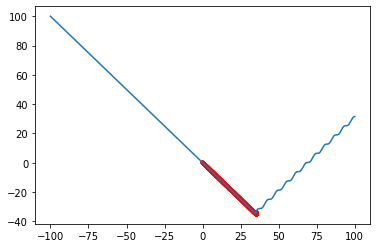

[34.92393906] [-34.92393906]
{'gradient_call_count': 1000, 'function_call_count': 1000}


In [1056]:
(x, y), meta = gradient_descent()
print(x, y)
print(meta)